In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
file_path = "/content/drive/MyDrive/new gait data/Final Data/imputed_rollator_data_advanced.csv"
df = pd.read_csv(file_path)

In [3]:
print("Original Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Original Column Names:
1. stride_count_with_rollator_slope_up
2. speed_with_rollator_slope_up
3. stride_count_with_rollator_slope_down
4. speed_with_rollator_slope_down
5. stride_count_with_rollator_gravel
6. speed_with_rollator_gravel
7. stride_count_with_rollator_sidewalk
8. speed_with_rollator_sidewalk
9. walking_speed_with_rollator_slope_down
10. walking_speed_with_rollator_slope_up
11. walking_speed_with_rollator_gravel
12. walking_speed_with_rollator_sidewalk
13. avg_z_accel_with_rollator_slope_up
14. avg_z_accel_with_rollator_slope_down
15. avg_z_accel_with_rollator_gravel
16. avg_z_accel_with_rollator_sidewalk
17. stride_count_without_rollator_slope_up
18. speed_without_rollator_slope_up
19. stride_count_without_rollator_slope_down
20. speed_without_rollator_slope_down
21. stride_count_without_rollator_gravel
22. speed_without_rollator_gravel
23. stride_count_without_rollator_sidewalk
24. speed_without_rollator_sidewalk
25. walking_speed_without_rollator_slope_up
26. walking_sp

Dataset shape: (60, 32)

First 5 rows of the dataset:
   stride_count_with_rollator_slope_up  speed_with_rollator_slope_up  \
0                                 61.0                         137.0   
1                                 59.0                         122.0   
2                                 63.0                         122.0   
3                                 60.0                         118.0   
4                                 52.0                         116.0   

   stride_count_with_rollator_slope_down  speed_with_rollator_slope_down  \
0                                   50.0                           118.0   
1                                   47.0                           127.0   
2                                   42.0                           122.0   
3                                   39.0                           110.0   
4                                   32.0                           108.0   

   stride_count_with_rollator_gravel  speed_with_rollato

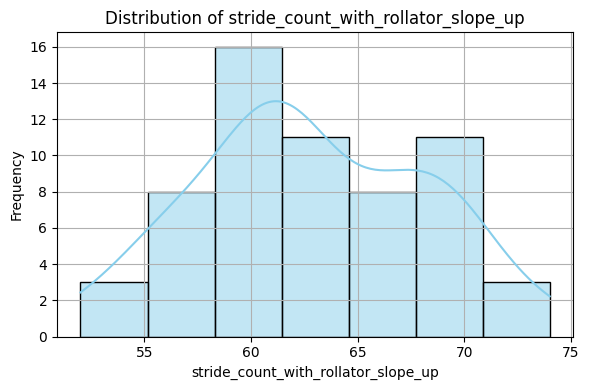

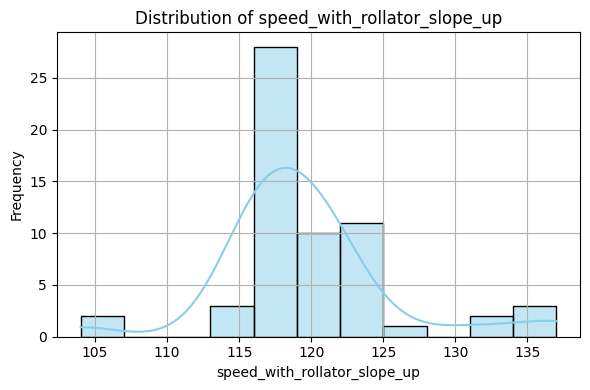

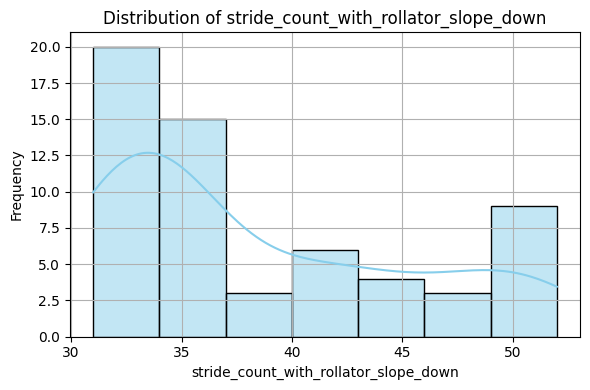

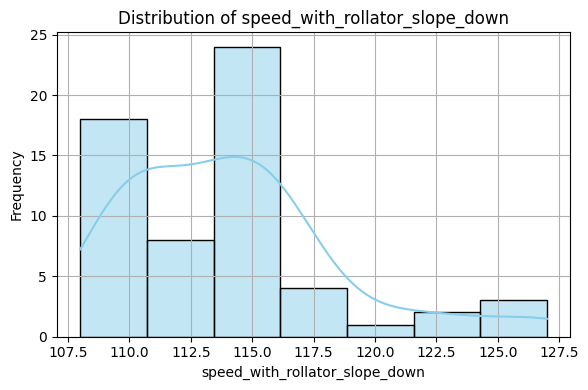

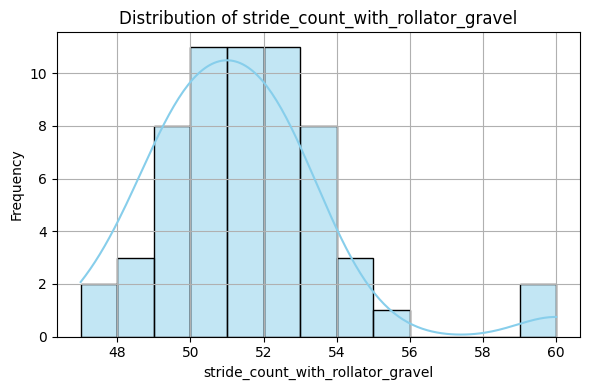

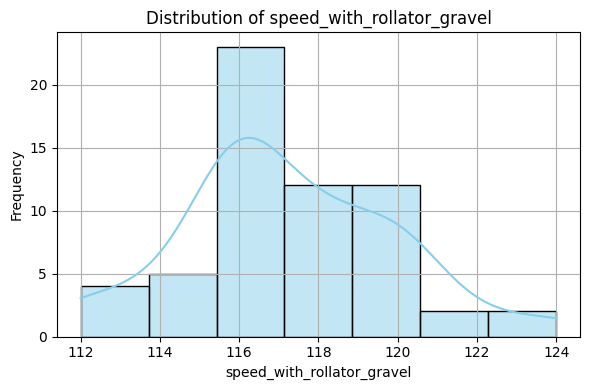

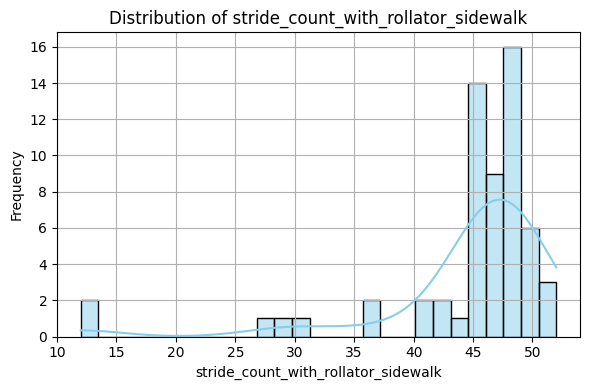

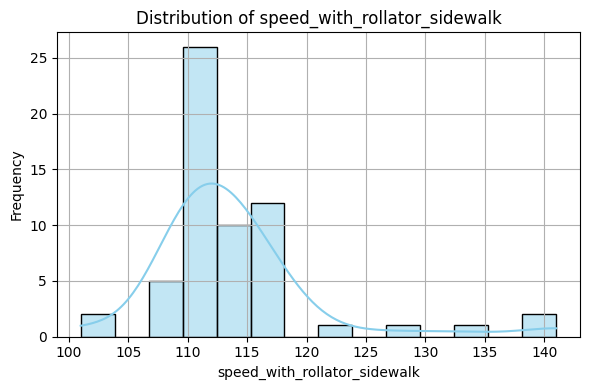

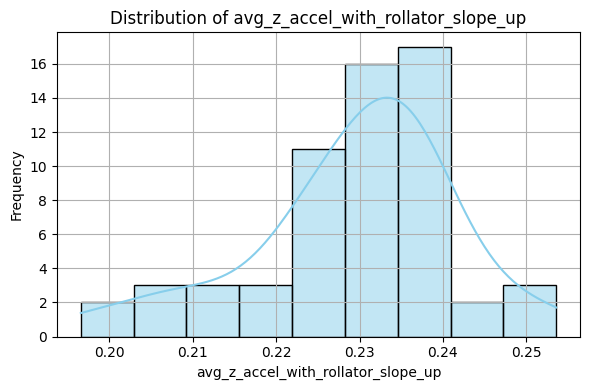

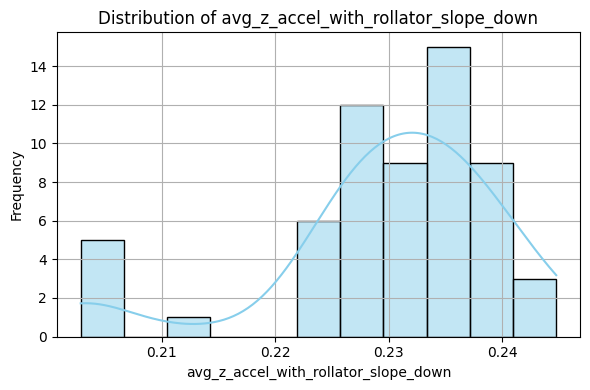

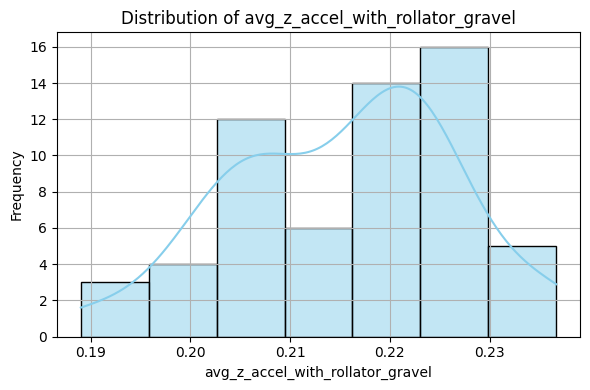

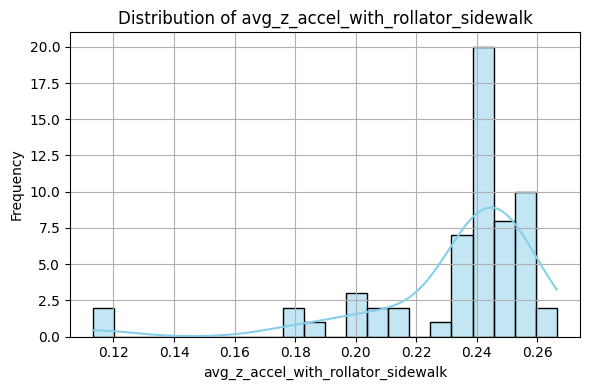


Feature categories:
With rollator features: 12
Without rollator features: 12
Stride count features: 8
Speed features: 8
Acceleration features: 8

Scaled data summary:
       stride_count_with_rollator_slope_up  speed_with_rollator_slope_up  \
count                         6.000000e+01                  6.000000e+01   
mean                          4.070818e-16                  1.100971e-15   
std                           1.008439e+00                  1.008439e+00   
min                          -2.044118e+00                 -2.603461e+00   
25%                          -7.249462e-01                 -5.936411e-01   
50%                          -1.595869e-01                 -2.586712e-01   
75%                           7.916527e-01                  4.112686e-01   
max                           2.101851e+00                  2.923543e+00   

       stride_count_with_rollator_slope_down  speed_with_rollator_slope_down  \
count                           6.000000e+01                    6.0

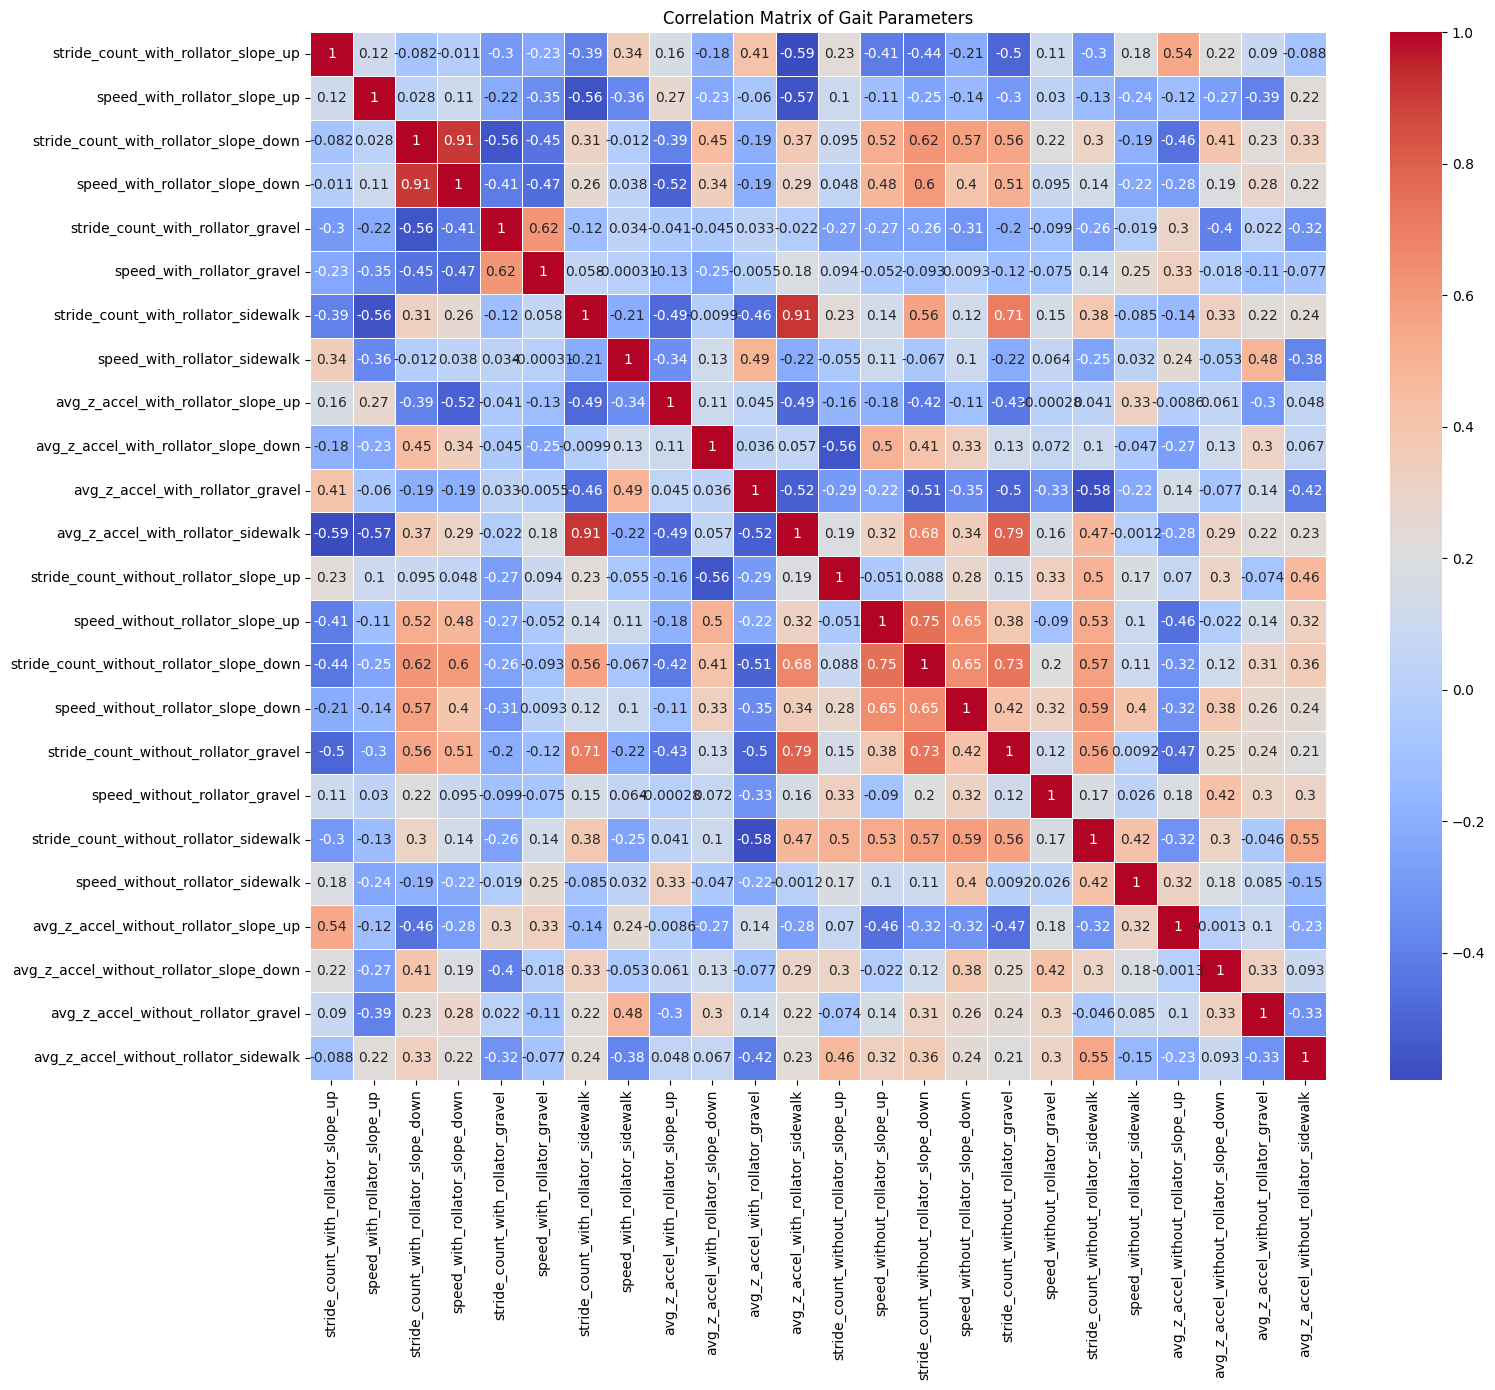


Number of comparable feature pairs: 12


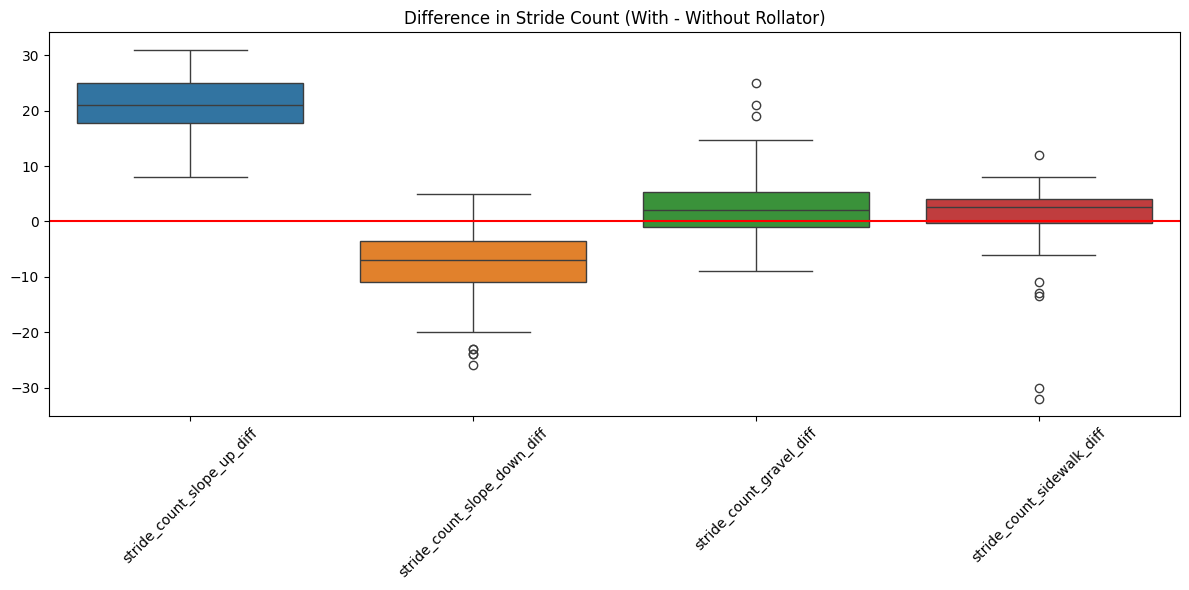

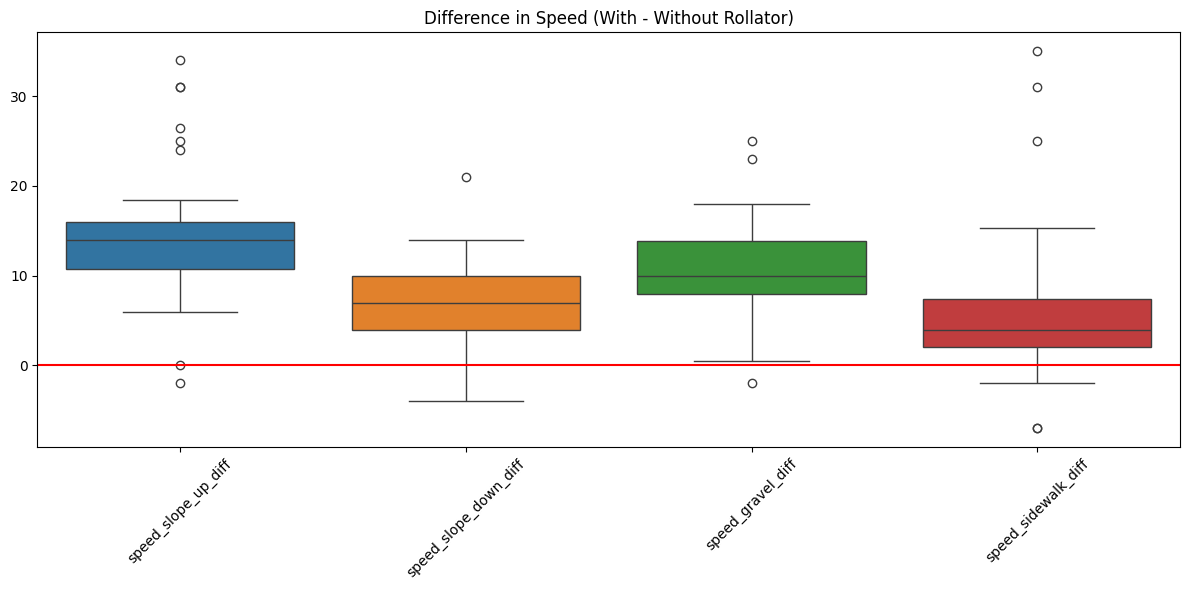

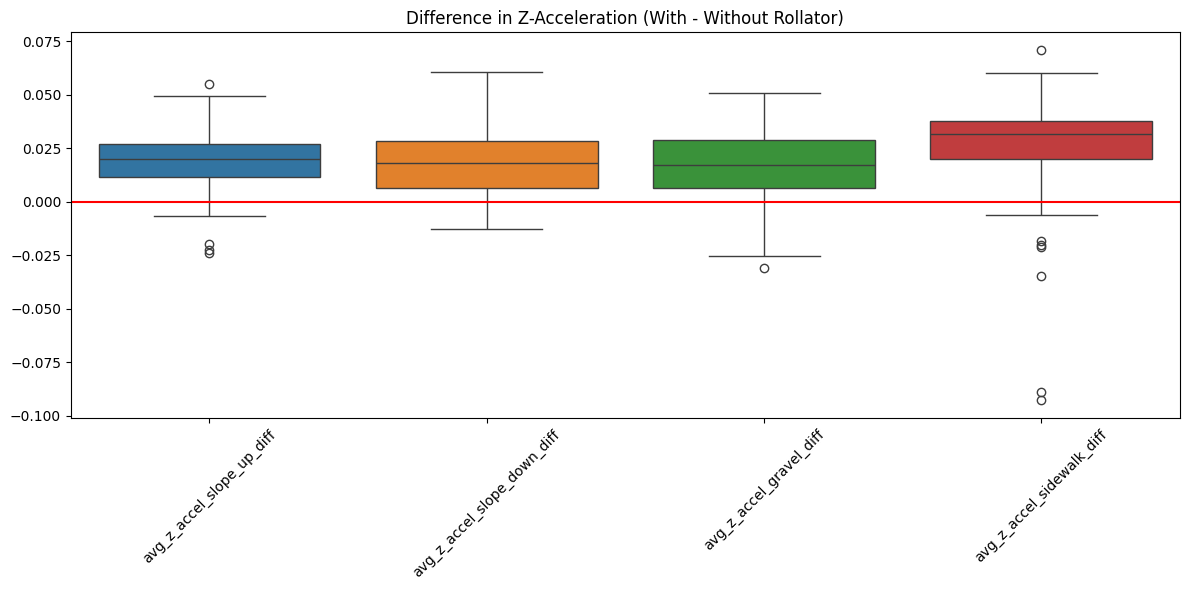


Preprocessing and exploration complete. Cleaned and scaled datasets saved.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
rollator_data = pd.read_csv("/content/drive/MyDrive/new gait data/Final Data/imputed_rollator_data_advanced.csv")


# 1. Data Understanding
print(f"Dataset shape: {rollator_data.shape}")
print("\nFirst 5 rows of the dataset:")
print(rollator_data.head())

# Basic statistics
print("\nBasic statistics:")
print(rollator_data.describe())

# 2. Check for missing values
print("\nMissing values in the dataset:")
print(rollator_data.isnull().sum())

# 3. Identify and handle the data leakage issue
# List all columns in the dataset
print("\nAll columns in the dataset:")
print(rollator_data.columns.tolist())

# Identify the walking_speed columns to remove (data leakage)
walking_speed_cols = [col for col in rollator_data.columns if 'walking_speed' in col]
print(f"\nWalking speed columns to remove (data leakage): {walking_speed_cols}")

# Create a cleaned dataset without the walking_speed columns
cleaned_data = rollator_data.drop(columns=walking_speed_cols)
print(f"\nCleaned dataset shape after removing walking_speed columns: {cleaned_data.shape}")

# Distribution Plots for Key Gait Parameters
print(f"\nDataset shape: {cleaned_data.shape}")
gait_features = ['stride_count_with_rollator_slope_up','speed_with_rollator_slope_up','stride_count_with_rollator_slope_down','speed_with_rollator_slope_down','stride_count_with_rollator_gravel','speed_with_rollator_gravel','stride_count_with_rollator_sidewalk','speed_with_rollator_sidewalk','avg_z_accel_with_rollator_slope_up','avg_z_accel_with_rollator_slope_down','avg_z_accel_with_rollator_gravel','avg_z_accel_with_rollator_sidewalk']  # update with actual column names

for col in gait_features:
    if col in cleaned_data.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 4. Feature Analysis - Group features by categories
with_rollator_cols = [col for col in cleaned_data.columns if 'with_rollator' in col]
without_rollator_cols = [col for col in cleaned_data.columns if 'without_rollator' in col]

# Group by measurement type
stride_count_cols = [col for col in cleaned_data.columns if 'stride_count' in col]
speed_cols = [col for col in cleaned_data.columns if 'speed' in col and 'walking_speed' not in col]
accel_cols = [col for col in cleaned_data.columns if 'accel' in col]

print("\nFeature categories:")
print(f"With rollator features: {len(with_rollator_cols)}")
print(f"Without rollator features: {len(without_rollator_cols)}")
print(f"Stride count features: {len(stride_count_cols)}")
print(f"Speed features: {len(speed_cols)}")
print(f"Acceleration features: {len(accel_cols)}")

# 4. Feature Scaling
# Standardize the features
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(cleaned_data),
    columns=cleaned_data.columns
)

print("\nScaled data summary:")
print(scaled_data.describe())

# 5. Correlation Analysis
# Calculate correlation matrix
correlation_matrix = cleaned_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Gait Parameters')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# 6. Comparative Analysis (With vs Without Rollator)
# Create pairs of features to compare (with vs without rollator)
feature_pairs = []
for col in with_rollator_cols:
    # Find the matching feature without rollator
    without_col = col.replace('with_rollator', 'without_rollator')
    if without_col in without_rollator_cols:
        feature_pairs.append((col, without_col))

print(f"\nNumber of comparable feature pairs: {len(feature_pairs)}")

# Analyze differences in terrain types
terrain_types = ['slope_up', 'slope_down', 'gravel', 'sidewalk']
measure_types = ['stride_count', 'speed', 'avg_z_accel']

# Prepare a dataframe for the comparison visualization
comparison_data = pd.DataFrame()

for measure in measure_types:
    for terrain in terrain_types:
        with_col = f"{measure}_with_rollator_{terrain}"
        without_col = f"{measure}_without_rollator_{terrain}"

        if with_col in cleaned_data.columns and without_col in cleaned_data.columns:
            # Create new columns for comparison
            comparison_data[f"{measure}_{terrain}_with"] = cleaned_data[with_col]
            comparison_data[f"{measure}_{terrain}_without"] = cleaned_data[without_col]
            comparison_data[f"{measure}_{terrain}_diff"] = cleaned_data[with_col] - cleaned_data[without_col]

# Visualize the differences in stride count across terrains
stride_diff_cols = [col for col in comparison_data.columns if 'stride_count' in col and 'diff' in col]
if stride_diff_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=comparison_data[stride_diff_cols])
    plt.title('Difference in Stride Count (With - Without Rollator)')
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.tight_layout()
    plt.savefig('stride_count_diff.png')
    plt.show()

# Visualize the differences in speed across terrains
speed_diff_cols = [col for col in comparison_data.columns if 'speed' in col and 'diff' in col]
if speed_diff_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=comparison_data[speed_diff_cols])
    plt.title('Difference in Speed (With - Without Rollator)')
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.tight_layout()
    plt.savefig('speed_diff.png')
    plt.show()

# Visualize the differences in acceleration across terrains
accel_diff_cols = [col for col in comparison_data.columns if 'avg_z_accel' in col and 'diff' in col]
if accel_diff_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=comparison_data[accel_diff_cols])
    plt.title('Difference in Z-Acceleration (With - Without Rollator)')
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.tight_layout()
    plt.savefig('accel_diff.png')
    plt.show()

# 9. Save the processed datasets for further analysis
cleaned_data.to_csv('cleaned_rollator_data.csv', index=False)
scaled_data.to_csv('scaled_rollator_data.csv', index=False)
comparison_data.to_csv('comparison_rollator_data.csv', index=False)

print("\nPreprocessing and exploration complete. Cleaned and scaled datasets saved.")

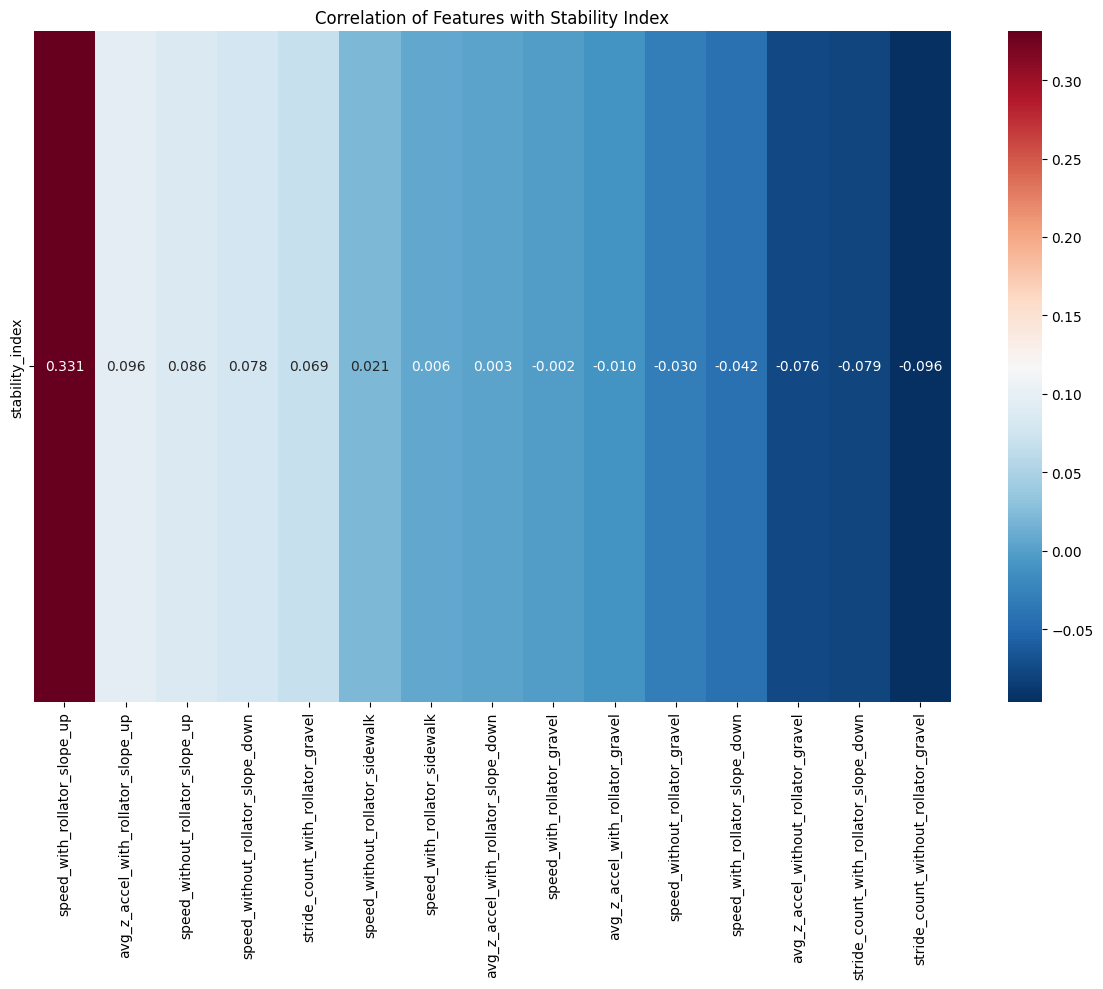

Additional visualization completed. All plots have been saved.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from scipy import stats


# 2.Heatmap of Feature Importance
# We can use correlation with a derived "stability" measure as a proxy for feature importance
# Create a stability index (this is just an example - you would define this based on your domain knowledge)
if all(col in cleaned_data.columns for col in ['avg_z_accel_with_rollator_sidewalk', 'stride_count_with_rollator_sidewalk']):
    cleaned_data['stability_index'] = cleaned_data['avg_z_accel_with_rollator_sidewalk'] / cleaned_data['stride_count_with_rollator_sidewalk']

    # Calculate correlation with the stability index
    feature_importance = cleaned_data.corr()['stability_index'].sort_values(ascending=False)

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    feature_importance = feature_importance.drop('stability_index')  # Remove self-correlation
    features_to_plot = feature_importance.iloc[:15]  # Top 15 features

    sns.heatmap(
        pd.DataFrame(features_to_plot).T,
        cmap='RdBu_r',
        annot=True,
        fmt=".3f"
    )
    plt.title('Correlation of Features with Stability Index')
    plt.tight_layout()
    plt.savefig('feature_importance_heatmap.png')
    plt.show()
    plt.show()

print("Additional visualization completed. All plots have been saved.")